## Reading the Data

First, I need to import my required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Property df.csv',index_col=0)
df.head()

,displayPrice,dateSold,tenure,newBuild,address,propertyType,bedrooms,images,hasFloorPlan,detailUrl,latitude,longitude
0,"£720,050",17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
1,"£445,000",12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
2,"£643,756",9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
3,"£355,000",7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
4,"£220,000",23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displayPrice  2278 non-null   object 
 1   dateSold      2278 non-null   object 
 2   tenure        2278 non-null   object 
 3   newBuild      2278 non-null   bool   
 4   address       2278 non-null   object 
 5   propertyType  2278 non-null   object 
 6   bedrooms      1588 non-null   float64
 7   images        2278 non-null   object 
 8   hasFloorPlan  2278 non-null   bool   
 9   detailUrl     1588 non-null   object 
 10  latitude      2278 non-null   float64
 11  longitude     2278 non-null   float64
dtypes: bool(2), float64(3), object(7)
memory usage: 200.2+ KB


# Cleaning the Data

Data Cleaning involves several steps:
- Correcting the data types
- Removing unnecesary columns
- Handling missing values
 
To make certain columns usable I will need to correct data types and also handle missing values. I will also remove unnecessary columns that are unnecessary in the analysis. But first, I will rename the columns.

In [4]:
rename_columns = ['Price','Date_Sold','Tenure_Type','New_Build','Address','Property_Type','Num_Bedrooms','Image_URL','Floorplan','URL','Latitude','Longitude']

df.columns = rename_columns

### Correcting Data Types 

I need to manipulate 'Price' and convert into an integer by removing the £ sign and comma and converting data type into int

In [5]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('£','')
df['Price'] = df['Price'].astype(int)

In [6]:
type(df['Price'][0])

numpy.int64

I want to now seperate 'Address' to two variables that are more useful to me: 'Post_Code' & 'Road_Name'

In [7]:
df['Post_Code'] = df['Address'].apply(lambda x: x[-7:])
df['Road_Name'] = df['Address'].apply(lambda x: x.split(',')[1])

After looking at the data more closely, I identified that some of the 'Road_Name' were incorrectly populated, where the the flat number will be used instead of the road name. Looking at it more closely, I can adjust the road name by utilising the fact that the incorrect road name has a short string length.

In [8]:
df.loc[df['Address'].str.contains('flat',case=False)]

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name
76,352000,27 Sep 2021,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,311
77,305000,1 Jun 2017,Leasehold,False,"Flat B, 311, Church Road, Leyton, London, Grea...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56918,-0.02366,E10 7JG,311
87,220100,3 Sep 2021,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
88,205000,29 Oct 2019,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
89,130000,27 Feb 2014,Leasehold,False,"Flat 19, Chessington Mansions, 14, Albany Road...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.57287,-0.01845,E10 7EW,Chessington Mansions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,257000,16 Sep 2015,Leasehold,False,"Flat 12, Salway House, 25, Thornhill Road, Lon...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56242,-0.01241,E10 5LZ,Salway House
2226,75500,10 Aug 2001,Leasehold,False,"Flat 12, Salway House, 25, Thornhill Road, Lon...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.56242,-0.01241,E10 5LZ,Salway House
2249,387500,12 Jul 2019,Leasehold,False,"Flat 17, Plaza Heights, 12, Maud Road, London,...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.55676,-0.00703,E10 5QS,Plaza Heights
2250,380000,6 Jul 2016,Leasehold,False,"Flat 17, Plaza Heights, 12, Maud Road, London,...",Flat,NaN,/spw/images/placeholder/no-image.svg,False,NaN,51.55676,-0.00703,E10 5QS,Plaza Heights


In [24]:
def incorrect_road_name(cols):
    road = cols[0]
    address = cols[1]

    if len(road) < 6:
        return address.split(',')[2]

    else:
        return road

In [25]:
df['Road_Name'] = df[['Road_Name','Address']].apply(incorrect_road_name,axis=1)

df.loc[df['Address'].str.contains('flat',case=False)].head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
162,485000,29 Jun 2021,Leasehold,False,"Flat C, 42, Grange Park Road, London, Greater ...",Flat,2.0,False,51.56543,-0.01473,E10 5ES,Grange Park Road,2021
163,450000,22 Jun 2018,Leasehold,False,"Flat C, 42, Grange Park Road, London, Greater ...",Flat,2.0,False,51.56543,-0.01473,E10 5ES,Grange Park Road,2018
164,250000,18 Apr 2013,Leasehold,False,"Flat C, 42, Grange Park Road, London, Greater ...",Flat,2.0,False,51.56543,-0.01473,E10 5ES,Grange Park Road,2013
165,122000,2 Jun 2000,Leasehold,False,"Flat C, 42, Grange Park Road, London, Greater ...",Flat,2.0,False,51.56543,-0.01473,E10 5ES,Grange Park Road,2000
166,54000,7 Jun 1995,Leasehold,False,"Flat C, 42, Grange Park Road, London, Greater ...",Flat,2.0,False,51.56543,-0.01473,E10 5ES,Grange Park Road,1995


I also want to analyse properties by year sold so I will convert 'Date_Sold' to 'Year_Sold'

In [11]:
df['Year_Sold'] = df['Date_Sold'].apply(lambda x: x[-4:])
df['Year_Sold'] =df['Year_Sold'].astype(int)

To make sure categorical features are the correct data type, I need to convert the features into object data types

In [12]:
categorical_columns = ['Tenure_Type','Property_Type','New_Build','Floorplan']
df[categorical_columns] = df[categorical_columns].astype(object)
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Image_URL,Floorplan,URL,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955,E10 7HN,Manor Road,2006


Looking through the frequency of the values in categorical features. I removed duplicates of the same property as the duplicates will inflate the values of the graphs.

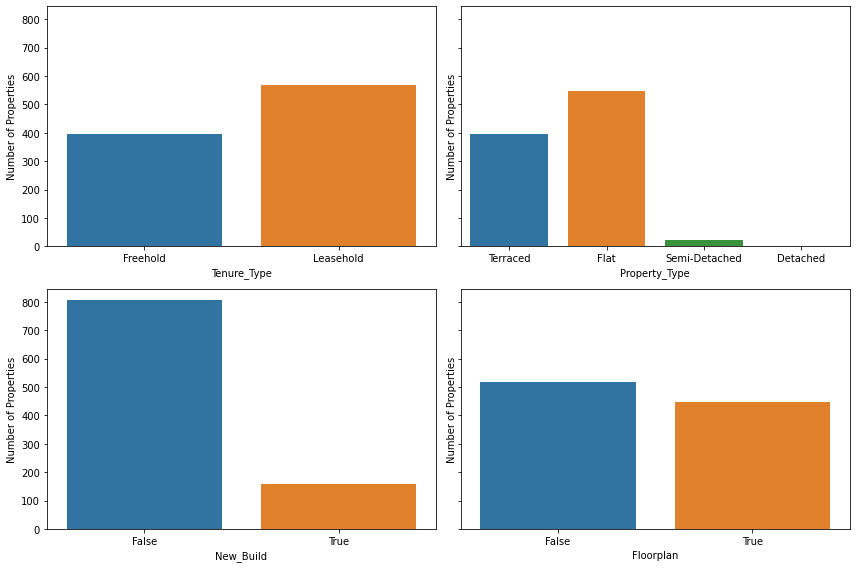

In [13]:
fig, axes = plt.subplots(2,2,figsize=(12,8), sharey=True)

for column, ax in zip(categorical_columns,axes.ravel()):
    sns.countplot(x=column,data=df.drop_duplicates(subset=['Address']),ax=ax)

    ax.set_ylabel('Number of Properties')



plt.tight_layout()

Renaming labels for some categories

In [14]:
df['New_Build'].replace({'False':'No','True':'Yes'},inplace=True)

df['Floorplan'].replace({'False':'No','True':'Yes'},inplace=True)

### Removing Unnecessary Columns

Removing the unnecessary columns: 'Image_URL' & 'URL'. The analysis has no use for the URL links of the property

In [15]:
df.drop(['Image_URL','URL'],axis=1,inplace=True)
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2006


### Handling Missing Values
Checking for any missing values. There seems to be missing values for 'Num_Bedrooms'

In [16]:
df.isnull().sum()

Price              0
Date_Sold          0
Tenure_Type        0
New_Build          0
Address            0
Property_Type      0
Num_Bedrooms     690
Floorplan          0
Latitude           0
Longitude          0
Post_Code          0
Road_Name          0
Year_Sold          0
dtype: int64

In [17]:
df.isnull().sum()*100/len(df)

Price             0.000000
Date_Sold         0.000000
Tenure_Type       0.000000
New_Build         0.000000
Address           0.000000
Property_Type     0.000000
Num_Bedrooms     30.289728
Floorplan         0.000000
Latitude          0.000000
Longitude         0.000000
Post_Code         0.000000
Road_Name         0.000000
Year_Sold         0.000000
dtype: float64

There are around 30% missing values for 'Num_Bedrooms' so it would usually be a good idea to disregard the column. Since, I believe number of bedrooms contain a large amount of information, I will remove the rows with number of bedrooms missing. I will try to impute the missing values in the future and compare if model performance improves.

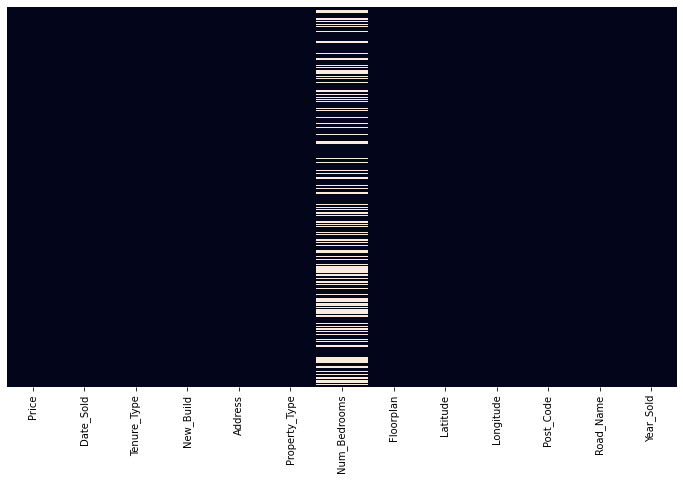

In [18]:
plt.figure(figsize=(12,7))
axis = sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [19]:
df.dropna(subset=['Num_Bedrooms'],inplace=True)

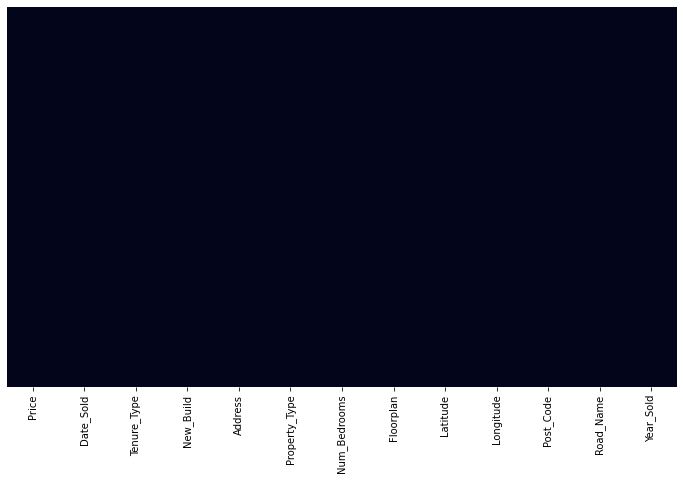

In [20]:
plt.figure(figsize=(12,7))
axis = sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

Ideally I would impute the missing values of number of bedrooms using the mean of price. However, house prices vary greatly depending year sold and therefore it would be too inaccurate to use the average price for all years. I would like to impute the number of bedrooms based on mean price for a given year.

## Exploratory Data Analysis

Before I conduct exploratory data analysis using Matplotlib and Seaborn, I will first export the dataframe to analyse in Tableau and create a dashboard to allow users to analyse the data and extract information. The dashboard hopefully allows users to draw insight and make decisions regarding potentially buying or selling properties in the area.

In [21]:
df.to_csv('Property Data Tableau.csv',index=False)

Please visit the dashboard here: 

Continuing to visualise the data, we can see below that on average as the number of bedrooms in a house increases, the price also increases. There is an exception where a 1 bedroom house has a higher average price compared to 2 bedroom houses. This can be due to an increase in number of sales of 1 bedroom properties compared to 2 bedroom properties in more recent years where house prices are significantly greater.

<AxesSubplot:xlabel='Num_Bedrooms', ylabel='Price'>

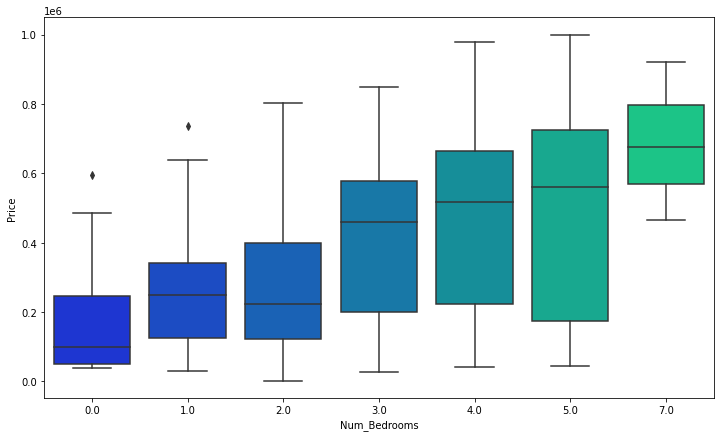

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Num_Bedrooms',y='Price',data=df,palette='winter')

Separating the different bedroom prices depending on the year. We can see that the more bedrooms a property has, the higher the mean price is.

NameError: name 'x' is not defined

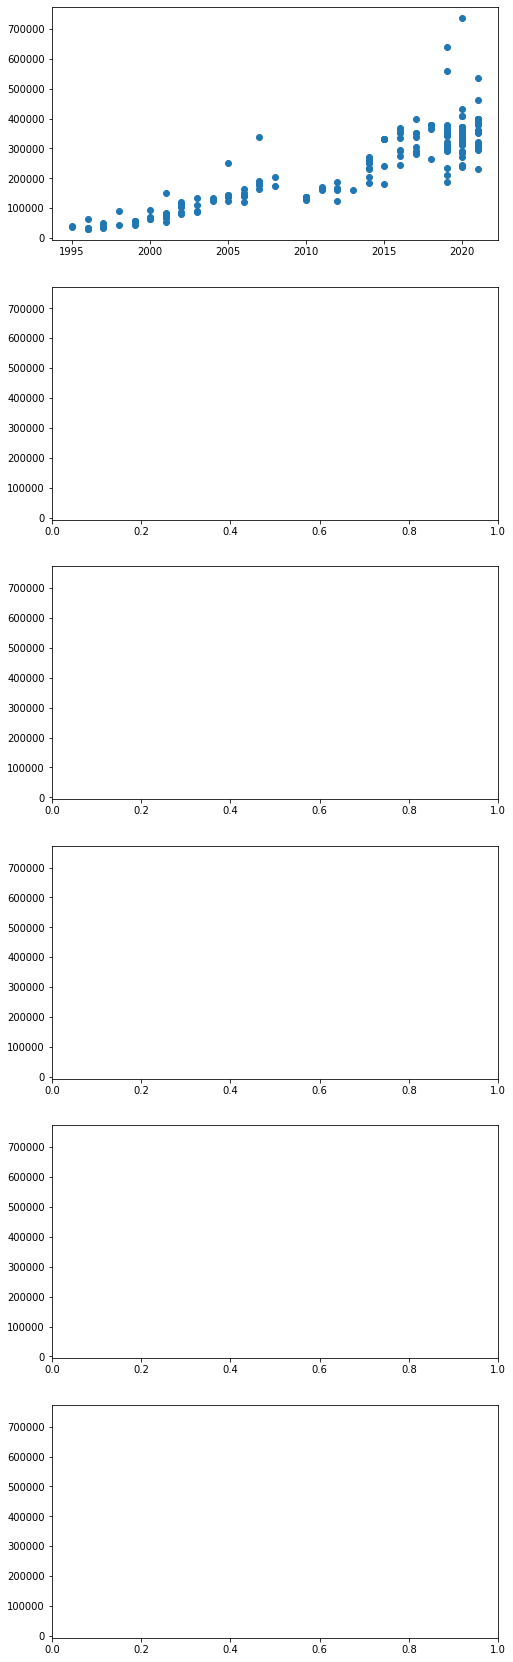

In [23]:
fig, axis = plt.subplots(6,1,figsize=(8, 30),sharey=True)

for idx, bedrooms in enumerate([1.0,2.0,3.0,4.0,5.0,7.0],0):
    axis[idx].scatter('Year_Sold','Price',data=df[df['Num_Bedrooms']==bedrooms])
    y_avg = [np.mean(x)] * len(x)
    ax.plot(x, y_avg, color='red', lw=6, ls='--', label="average plot")
    axis[idx].plot('Year_Sold','Price')
    axis[idx].set_title('Price of a {} Bedroom Property'.format(bedrooms))

plt.tight_layout()

## Data Preprocessing

- Remove outliers
- Remove Multicolinearity
- Convert Datatypes (Categoric -> Numeric Data)